# Customizing Ticks

Matplotlib's default tick locates and formatters are designed to be generally sufficient for many common situations, but are in no way optimal for every plot. This section will give examples of adjusting tick locations and formatting for many different plots we might be interested in.

Matplotlib aims to have a Python object representing everything that appears on the plot: for example, recall that the `figure` is the bounding box within which plot elements appear. Each Matplotlib object can also act as a container of sub-objects: for example: each `figure` can contain one or more `axes` objects, each of which in turn contain other objects representing plot contents.

The tick marks are no exception. Each `axes` has attributes `xaxis` and `yaxis`, which in turn have attributes that contain all the properties of the lines, ticks, and the labels that make up the axes.

## Major and Minor Ticks

Within each axis, there is a concept of a _major_ tick mark, and a _minor_ tick mark. Major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place we can see them is within logarithmic plots:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

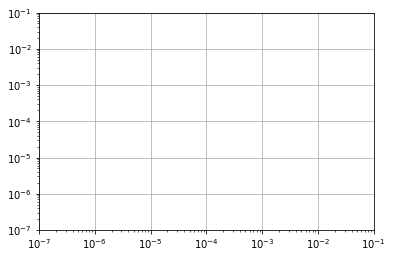

In [2]:
ax = plt.axes(xscale='log', yscale='log')
ax.set_xlim(10e-8, 10e-2)
ax.set_ylim(10e-8, 10e-2)
ax.grid();

We can see that each major ticks shows a large tickmark and a label, while each minor tick shows a smaller tickmark with no label.

These tick properties (locations and labels) can be customized by setting the `formatter` and `locator` objects of each axis. Let's examine these for the x axis of the just shown plot:

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We see that both major and minor tick labels have their locations specified by a `LogLocator`, which makes sense for a logarithmic plot. 

We'll now take a look at a few examples of setting these locators and formatters for various plots.

## Hiding Ticks or Labels

The act of hiding ticks or labels can be done using `plt.NullLocator()` and `plt.NullFormatter()`, as shown here:

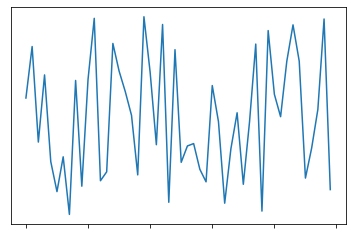

In [5]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

We removed the labels (but kept the ticks/gridlines) from the x axis, and removed the ticks (and thus the labels as well) from the y axis. Having no ticks can be useful in many situations. For instance, consider the following figure, which includes images of different faces, and example often used in supervised machine learning problems:

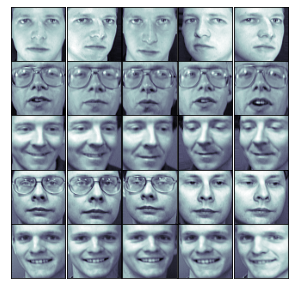

In [6]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

Notice that each image has its own axes, and we've set the locators to null because the tick values do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowsed labels:

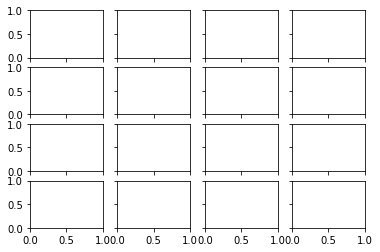

In [7]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

For the x ticks, the numbers nearly overlap and make them quite difficult to read. We can fix this with the `plt.MaxNLocator()`, which allows us to specify the maximum number of ticks that will be displayed. Matplotlib uses internal logic to choose the particular tick locations:

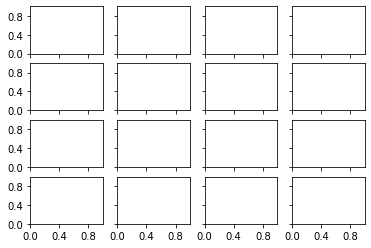

In [8]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

For even more control over the locations of regularly spaced ticks, we might also use `plt.MultipleLocator`.

# Fancy Tick Formats

Matplotlib's default tick formatting works well as a broad default, but sometimes we'd like to do something more. Consider this plot of a sine and a cosine

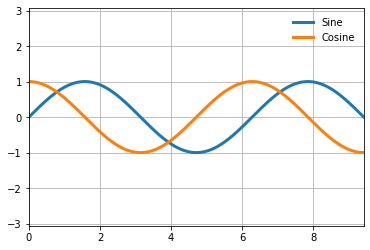

In [9]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple changes we might like to make. It would be more natural for this data to space the ticks and grid lines in multiples of $\pi$. We can do this by setting a `MultipleLocator`, which locates ticks at a multiple of the provided number. For good measure, we'll add both major and minor ticks in multiples of $\frac{\pi}{4}$.

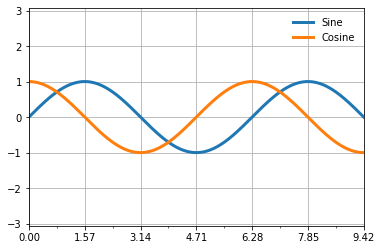

In [10]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now the decimal representation of the labels might be a little misleading. To fix this, we can change the tick formatter. There's no built-in formatter for what we want to do, so we'll instead use `plt.FuncFormatter`, which accepts a user-defined function giving fine grained control over the tick outputs:

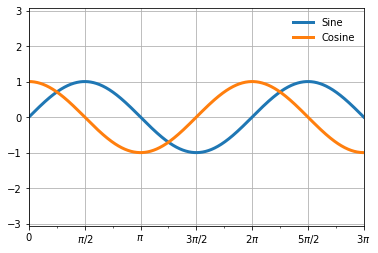

In [11]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

Notice that we've made use of Matplotlib's $\LaTeX$ support, specified by enclosing the string within dollar signs. 

The `plt.FuncFormatter()` offers extremly fine-grained control over the appearance of plot ticks, and comes in very handy when preparing professional looking plots.

The book finishes this section with a very handy [Summary of Formatters and Locators](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html#Summary-of-Formatters-and-Locators), which is a great reference.